# Tarea : Effective Spread

- David Campos Ambriz / 744435


Using Roll's model for effective spreads, do the following using the `aapl_5m_train.csv` dataset:

- Determine the effective spread using the block method `cov([dt1, dt2, dt3], [dt4, dt5, dt6])`
- Determine the effective spread using the serial covariance `cov([dt1, dt2, dt3], [dt2, dt3, dt4])`
- Infer the last operation type
- Calculate the Bid & Ask price using a window size of [5, 10, 20, 50, 100]
- Find the average spread of AAPL and analyze the spreads of all methods to find which one fits best for this time series
- Upload a jupyter notebook with the results

---

## Paqueterias

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Config Graficos

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = plt.cycler(
    color=["skyblue", "steelblue", "navy", "royalblue", "mediumslateblue"]
)

## Datos generales

In [40]:
df = pd.read_csv('aapl_5m_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39579 entries, 0 to 39578
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39579 non-null  int64  
 1   Timestamp   39579 non-null  int64  
 2   Gmtoffset   39579 non-null  int64  
 3   Datetime    39579 non-null  object 
 4   Open        39575 non-null  float64
 5   High        39575 non-null  float64
 6   Low         39575 non-null  float64
 7   Close       39575 non-null  float64
 8   Volume      39160 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.7+ MB


In [ ]:
df.drop(columns=['Unnamed: 0', 'Gmtoffset',
                 'Datetime', 'Volume'], inplace=True)
df

,Timestamp,Open,High,Low,Close
0,1609770600,133.570007,133.611602,132.389999,132.809997
1,1609770900,132.750000,132.750000,131.809997,131.889999
2,1609771200,131.500000,132.339996,131.500000,132.059997
3,1609771500,132.000000,132.250000,131.899993,132.250000
4,1609771800,132.000000,132.018096,131.520004,131.589996
...,...,...,...,...,...
39574,1672432800,129.029998,129.130004,128.919998,129.054992
39575,1672433100,129.059997,129.399993,129.020004,129.380004
39576,1672433400,129.375000,129.929992,129.330001,129.764404
39577,1672433700,129.764999,129.949996,129.619995,129.949996


Diferencia entre los precios de cierre

In [42]:
df['diff'] = df['Close'].diff()
df = df.dropna().reset_index(drop=True)
df

,Timestamp,Open,High,Low,Close,diff
0,1609770900,132.750000,132.750000,131.809997,131.889999,-0.919998
1,1609771200,131.500000,132.339996,131.500000,132.059997,0.169998
2,1609771500,132.000000,132.250000,131.899993,132.250000,0.190003
3,1609771800,132.000000,132.018096,131.520004,131.589996,-0.660004
4,1609772100,132.000000,132.089996,131.300003,131.448898,-0.141098
...,...,...,...,...,...,...
39567,1672432800,129.029998,129.130004,128.919998,129.054992,0.014999
39568,1672433100,129.059997,129.399993,129.020004,129.380004,0.325012
39569,1672433400,129.375000,129.929992,129.330001,129.764404,0.384400
39570,1672433700,129.764999,129.949996,129.619995,129.949996,0.185592


## Block method 

`cov([dt1, dt2, dt3], [dt4, dt5, dt6])`

In [43]:
df_windows = df.copy()
df_windows = df_windows.dropna().reset_index(drop=True)

windows = [5, 10, 20, 50, 100]

In [ ]:
for n_window in windows:
    cov = [np.nan] * len(df_windows)

    for i in range(len(df_windows) - 2 * n_window + 1):
        block1 = df_windows['diff'][i:i + n_window]
        block2 = df_windows['diff'][i + n_window:i + 2 * n_window]

        cov_val = np.abs(np.cov(block1, block2)[0, 1])

        cov[i + 2 * n_window - 1] = cov_val

    df_windows[f'Cov_{n_window}'] = cov
    df_windows[f'Spread_{n_window}'] = 2 * \
                                       np.sqrt(df_windows[f'Cov_{n_window}'])

df_windows

,Timestamp,Open,High,Low,Close,diff,Cov_5,Spread_5,Cov_10,Spread_10,Cov_20,Spread_20,Cov_50,Spread_50,Cov_100,Spread_100
0,1609770900,132.750000,132.750000,131.809997,131.889999,-0.919998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1609771200,131.500000,132.339996,131.500000,132.059997,0.169998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1609771500,132.000000,132.250000,131.899993,132.250000,0.190003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1609771800,132.000000,132.018096,131.520004,131.589996,-0.660004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1609772100,132.000000,132.089996,131.300003,131.448898,-0.141098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,1672432800,129.029998,129.130004,128.919998,129.054992,0.014999,0.005183,0.143989,0.001034,0.064309,0.001851,0.086049,0.000548,0.046804,0.010052,0.200519
39568,1672433100,129.059997,129.399993,129.020004,129.380004,0.325012,0.010577,0.205689,0.000199,0.028237,0.001259,0.070957,0.000557,0.047191,0.010005,0.200046
39569,1672433400,129.375000,129.929992,129.330001,129.764404,0.384400,0.007774,0.176345,0.009258,0.192435,0.002945,0.108540,0.000333,0.036521,0.010244,0.202426
39570,1672433700,129.764999,129.949996,129.619995,129.949996,0.185592,0.007761,0.176193,0.008288,0.182080,0.001540,0.078493,0.000748,0.054715,0.010351,0.203482


In [ ]:
bid_ask_df = pd.DataFrame()

for i in range(len(windows)):
    bid_ask_df[f'Bid_{windows[i]}'] = np.where(df_windows['diff'] > 0,
                                               df_windows['Close'] -
                                               df_windows[f'Spread_{windows[i]}'],
                                               df_windows['Close'])

    bid_ask_df[f'Ask_{windows[i]}'] = np.where(df_windows['diff'] > 0,
                                               df_windows['Close'],
                                               df_windows['Close'] + df_windows[f'Spread_{windows[i]}'])

bid_ask_df

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...
39567,128.911003,129.054992,128.990683,129.054992,128.968943,129.054992,129.008188,129.054992,128.854473,129.054992
39568,129.174315,129.380004,129.351767,129.380004,129.309047,129.380004,129.332813,129.380004,129.179958,129.380004
39569,129.588059,129.764404,129.571969,129.764404,129.655864,129.764404,129.727883,129.764404,129.561978,129.764404
39570,129.773803,129.949996,129.767916,129.949996,129.871503,129.949996,129.895281,129.949996,129.746514,129.949996


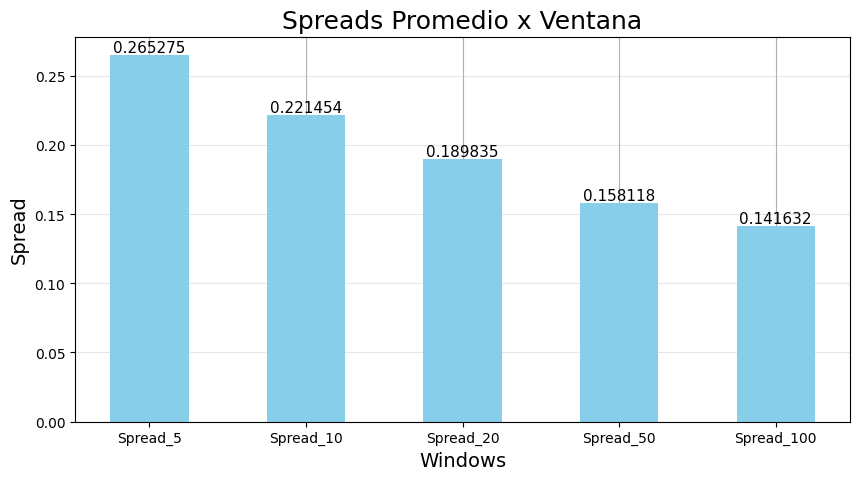

In [ ]:
prom_spreads1 = [df_windows[f'Spread_{window}'].mean() for window in windows]
plt.bar([f'Spread_{window}' for window in windows],
        prom_spreads1, zorder=2, width=0.5)

for i, w in enumerate(prom_spreads1):
    plt.text(i, w, f'{w:.6f}', ha='center', va='bottom', fontsize=11)

plt.title('Spreads Promedio x Ventana', fontsize=18)
plt.ylabel('Spread', fontsize=14)
plt.xlabel('Windows', fontsize=14)
plt.grid(alpha=0.3, zorder=0, axis='y')
plt.show()

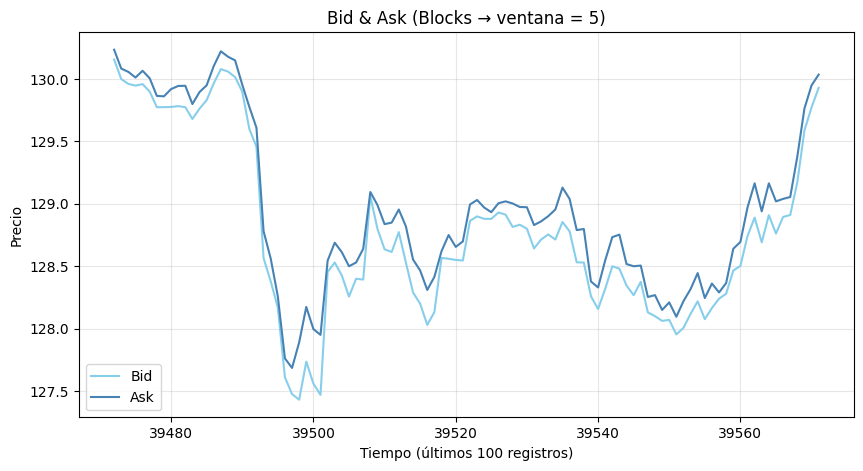

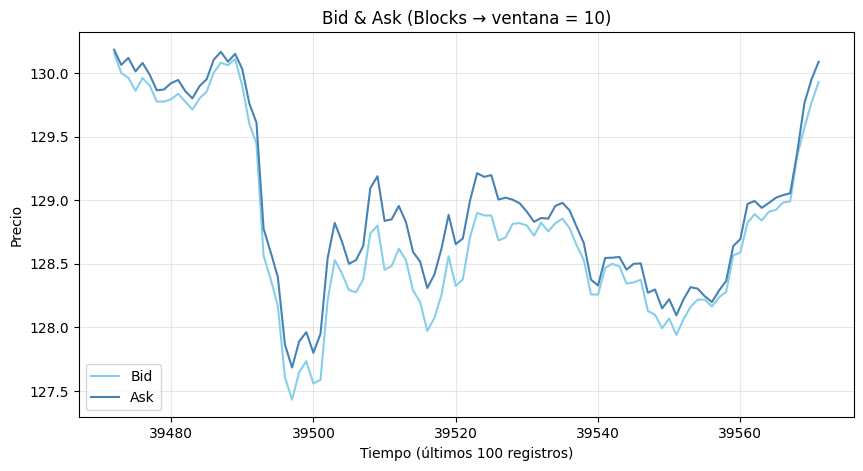

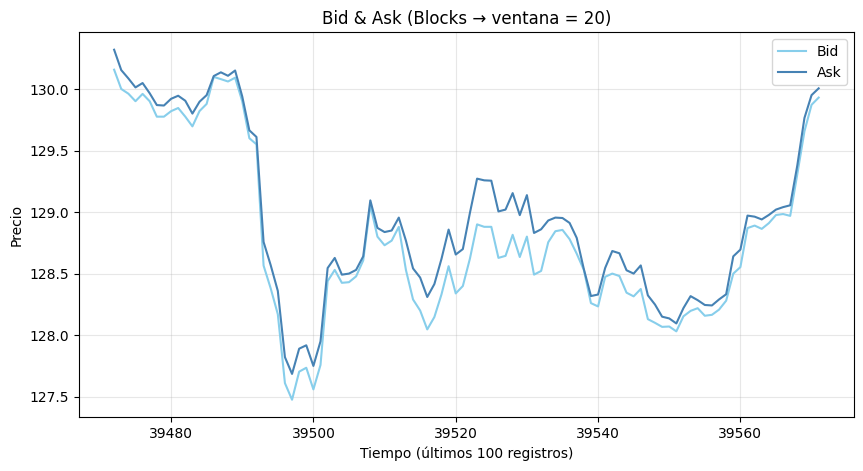

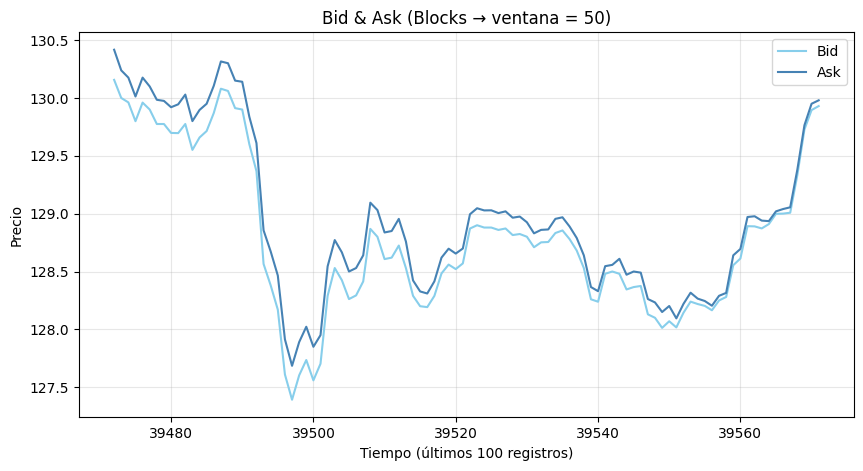

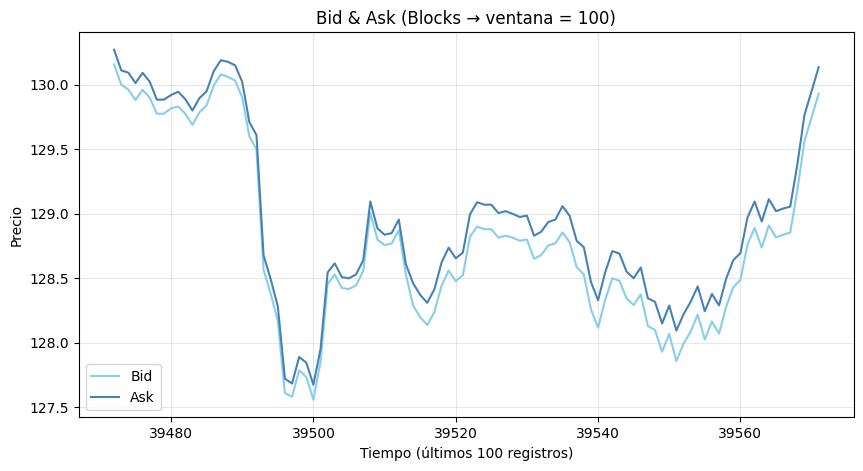

In [ ]:
for i in windows:
    bid_series = bid_ask_df[f'Bid_{i}'].tail(100)
    ask_series = bid_ask_df[f'Ask_{i}'].tail(100)

    plt.plot(bid_series.index, bid_series, label='Bid')
    plt.plot(ask_series.index, ask_series, label='Ask')

    plt.title(f'Bid & Ask (Blocks → ventana = {i})')
    plt.xlabel('Tiempo (últimos 100 registros)')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

## Serial covariance

`cov([dt1, dt2, dt3], [dt2, dt3, dt4])`



In [48]:
df_serialco = df.copy()
df_serialco = df_serialco.dropna().reset_index(drop=True)

In [ ]:
df_serialco['diff_jump'] = df_serialco['diff'].shift(1)
df_serialco = df_serialco.dropna().reset_index(drop=True)

df_serialco['Operation_Type'] = np.where(df_serialco['diff'] > 0, 'Ask', 'Bid')

for window in windows:
    df_serialco[f'Cov_{window}'] = df_serialco['diff'].rolling(
        window=window).cov(df_serialco['diff_jump'])
    df_serialco[f'Spread_{window}'] = 2 * \
                                      np.sqrt(np.abs(df_serialco[f'Cov_{window}']))

df_serialco

,Timestamp,Open,High,Low,Close,diff,diff_jump,Operation_Type,Cov_5,Spread_5,Cov_10,Spread_10,Cov_20,Spread_20,Cov_50,Spread_50,Cov_100,Spread_100
0,1609771200,131.500000,132.339996,131.500000,132.059997,0.169998,-0.919998,Ask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1609771500,132.000000,132.250000,131.899993,132.250000,0.190003,0.169998,Ask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1609771800,132.000000,132.018096,131.520004,131.589996,-0.660004,0.190003,Bid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1609772100,132.000000,132.089996,131.300003,131.448898,-0.141098,-0.660004,Bid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1609772400,131.544998,131.669998,131.070007,131.119995,-0.328903,-0.141098,Bid,-0.079894,0.565312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39566,1672432800,129.029998,129.130004,128.919998,129.054992,0.014999,0.019989,Ask,-0.002153,0.092807,-0.007281,0.170663,-0.002021,0.089920,-0.001597,0.079913,0.004417,0.132918
39567,1672433100,129.059997,129.399993,129.020004,129.380004,0.325012,0.014999,Ask,-0.002983,0.109240,-0.008514,0.184538,-0.003648,0.120792,-0.001944,0.088185,0.004450,0.133413
39568,1672433400,129.375000,129.929992,129.330001,129.764404,0.384400,0.325012,Ask,0.013455,0.231993,0.001375,0.074165,0.000684,0.052312,0.000681,0.052211,0.005782,0.152079
39569,1672433700,129.764999,129.949996,129.619995,129.949996,0.185592,0.384400,Ask,0.011183,0.211500,0.005165,0.143741,0.002100,0.091643,0.001991,0.089236,0.006512,0.161393


In [ ]:
bid_ask_df = pd.DataFrame()

for i in range(len(windows)):
    bid_ask_df[f'Bid_{windows[i]}'] = np.where(df_serialco['diff'] > 0,
                                               df_serialco['Close'] -
                                               df_serialco[f'Spread_{windows[i]}'],
                                               df_serialco['Close'])

    bid_ask_df[f'Ask_{windows[i]}'] = np.where(df_serialco['diff'] > 0,
                                               df_serialco['Close'],
                                               df_serialco['Close'] + df_serialco[f'Spread_{windows[i]}'])

bid_ask_df

,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
1,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
2,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
3,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
4,131.119995,131.685307,131.119995,NaN,131.119995,NaN,131.119995,NaN,131.119995,NaN
...,...,...,...,...,...,...,...,...,...,...
39566,128.962185,129.054992,128.884329,129.054992,128.965072,129.054992,128.975079,129.054992,128.922074,129.054992
39567,129.270764,129.380004,129.195466,129.380004,129.259212,129.380004,129.291819,129.380004,129.246591,129.380004
39568,129.532411,129.764404,129.690239,129.764404,129.712092,129.764404,129.712193,129.764404,129.612325,129.764404
39569,129.738496,129.949996,129.806255,129.949996,129.858353,129.949996,129.860760,129.949996,129.788603,129.949996


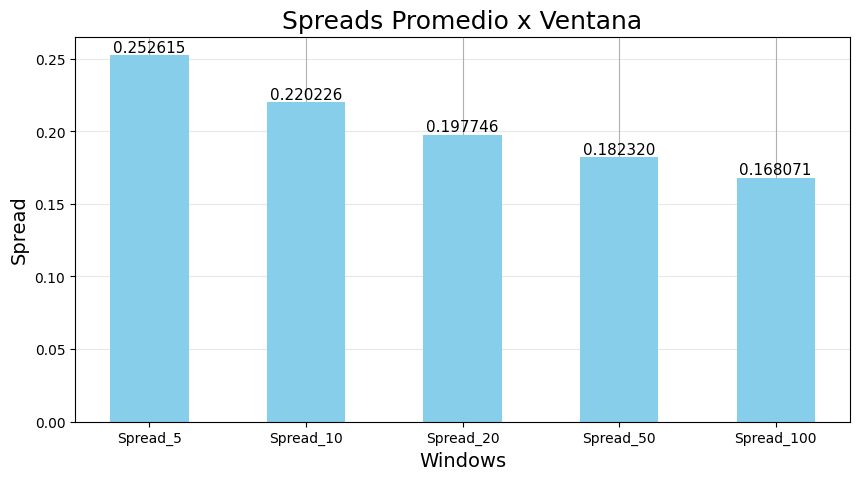

In [ ]:
prom_spreads2 = [df_serialco[f'Spread_{window}'].mean() for window in windows]
plt.bar([f'Spread_{window}' for window in windows],
        prom_spreads2, zorder=2, width=0.5)

for i, w in enumerate(prom_spreads2):
    plt.text(i, w, f'{w:.6f}', ha='center', va='bottom', fontsize=11)

plt.title('Spreads Promedio x Ventana', fontsize=18)
plt.ylabel('Spread', fontsize=14)
plt.xlabel('Windows', fontsize=14)
plt.grid(alpha=0.3, zorder=0, axis='y')
plt.show()

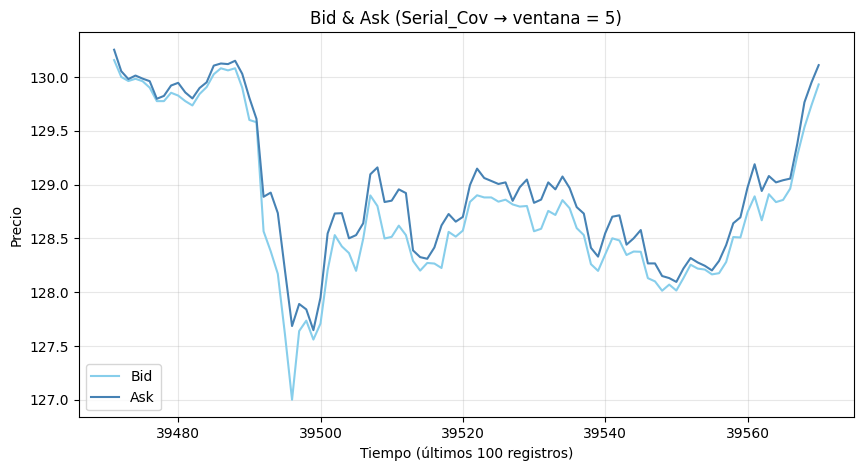

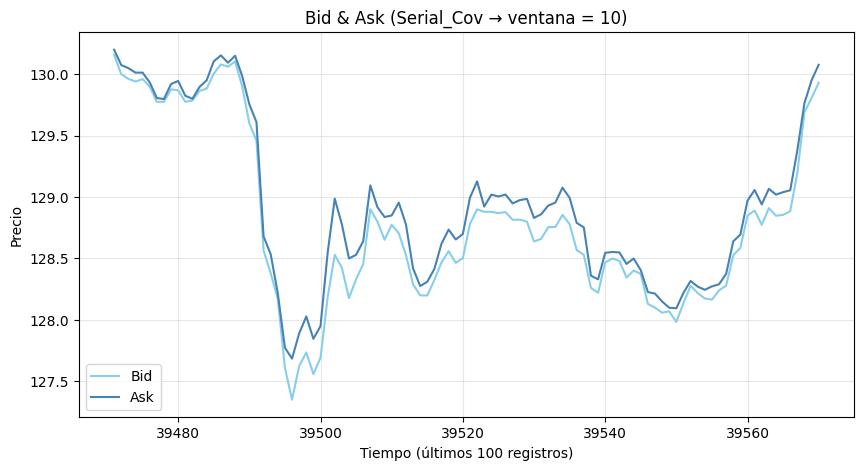

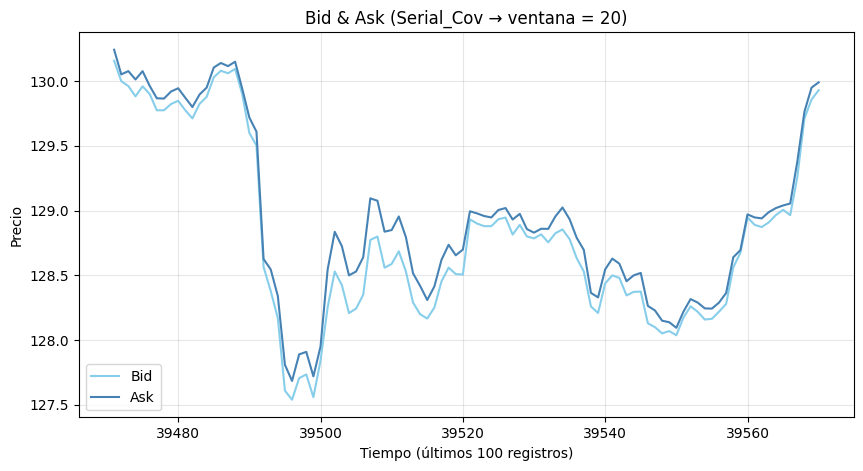

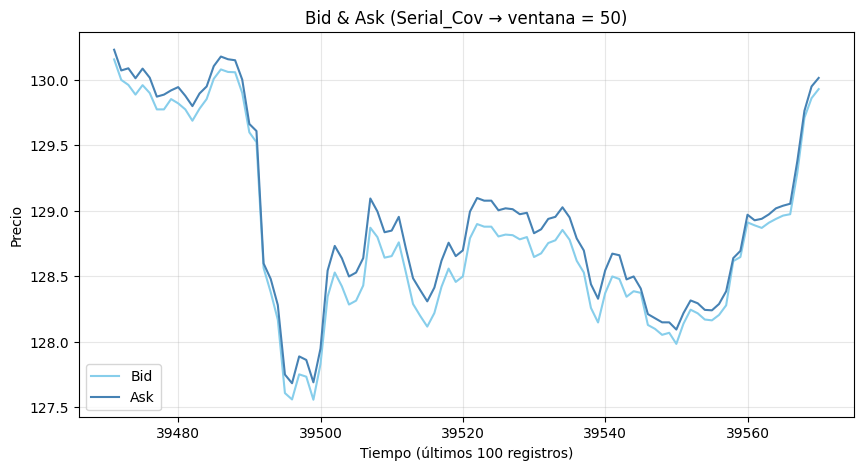

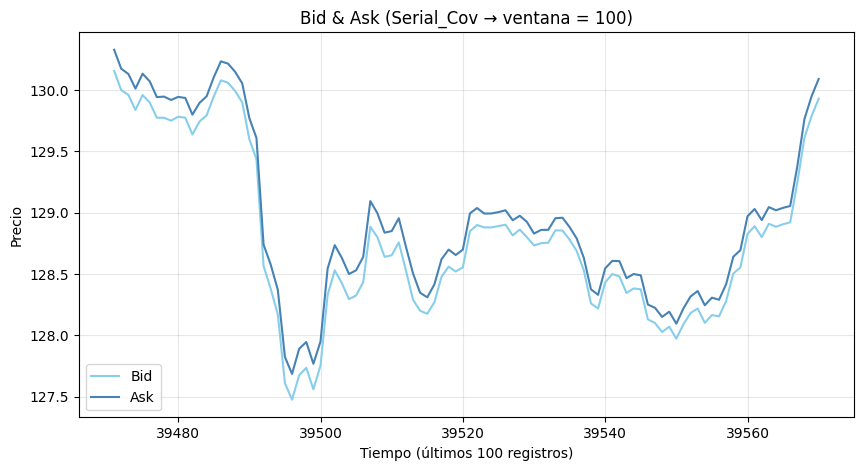

In [ ]:
for i in windows:
    bid_series = bid_ask_df[f'Bid_{i}'].tail(100)
    ask_series = bid_ask_df[f'Ask_{i}'].tail(100)

    plt.plot(bid_series.index, bid_series, label='Bid')
    plt.plot(ask_series.index, ask_series, label='Ask')

    plt.title(f'Bid & Ask (Serial_Cov → ventana = {i})')
    plt.xlabel('Tiempo (últimos 100 registros)')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

## Resultados

In [53]:
df_resultados = pd.DataFrame(
    [prom_spreads1, prom_spreads2],
    index=["Resultados por Bloques", "Resultados por Serial_Cov"],
    columns=[f"Window {w}" for w in windows]
)
df_resultados

,Window 5,Window 10,Window 20,Window 50,Window 100
Resultados por Bloques,0.265275,0.221454,0.189835,0.158118,0.141632
Resultados por Serial_Cov,0.252615,0.220226,0.197746,0.182320,0.168071


De acuerdo con los resultados anteriores, se observa que ambos metodos tienden a ajustarse en mejor o peor medida con el aumento del tamaño de la ventada, por ejemplo, en las primeras ventanas el mejor metodo aparentaria ser en el serial covarianza mientras que en las ventanas mas grandes el metodo de bloques. Esto quiza podria ser explicado por la relacion/cercania con la que se estan tomando los datos pues un metodo los toma seriados y en el otro se encuentran mas separado al tomarlos por bloque. Independientemente de cual es mejor que el otro, algo a resaltar es que ambos metodos tienden a reducir el spread conforme aumenta el tamaño de la ventana. Esto ultimo se aprecia tanto en el resultado numerico como en las graficas de los spreads de cada ventana donde el espacio entre ambas rectas disminuye pareciendose mas una a la otra.